In [1]:
%matplotlib inline
import config
import models
import keras
import os
import sys
import argparse
import numpy as np
import pickle
from keras import backend as K

from keras.layers import *
from keras.models import Model, Sequential
from keras.utils import plot_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import History, EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam

import matplotlib.image as mpimg
from skimage.transform import resize
import matplotlib
from matplotlib import pyplot as plt


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [22]:
input_shape = (224, 224)
batch_size = 32

train_data = models.getTrainData(batch_size, data_aug=True, target_size=input_shape)
val_data = models.getValData(batch_size, data_aug=True, target_size=input_shape)
test_data = models.getTestData(target_size = input_shape)

Found 1020 images belonging to 102 classes.
Found 1020 images belonging to 102 classes.
Found 6149 images belonging to 102 classes.


In [5]:
model = models.getVGG16()
print model.name
model.load_weights('trained/vgg16/vgg16_best.hdf5')

vgg16


In [72]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='rmsprop',
              metrics=['accuracy'])
print(model.metrics_names)
model.evaluate_generator(generator=test_data, use_multiprocessing=True, workers=6)

['loss', 'acc']


[1.1682931356729385, 0.7108472922620278]

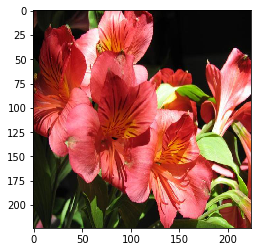

In [25]:
(x_, y_) = test_data.next()

In [133]:
y_.shape

(32, 102)

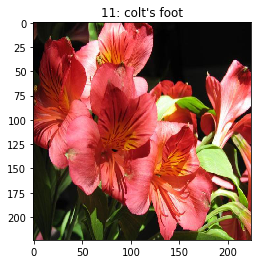

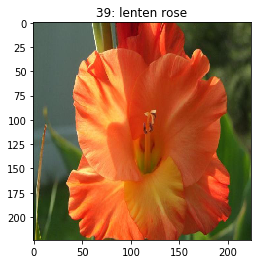

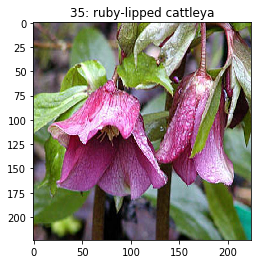

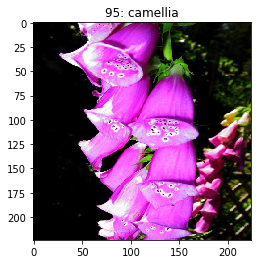

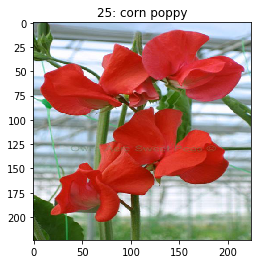

In [155]:
index_true = np.argmax(y_, axis = 1)
for i in range(5):
    plt.figure()
    plt.imshow(x_[i, :,:,:])
    plt.title('{}: {}'.format(index[i], config.classes[index[i]]))

In [145]:
y_pred = model.predict(x_)

In [193]:
index_pred = np.argmax(y_pred, axis = 1)
print(index_pred)
print(index_true)
index_top5 = []
for i in range(batch_size):
    index_top5.append(np.array(y_pred[i, :].argsort()[-5:][::-1]))

[ 11  36  17  95  39  39 100  48 100  31   3   4  57  77  48  33  38  10
  93  70   8  76  55  69  97  24  40  53  84  60   5  91]
[ 11  39  35  95  25  39 100  48 100  31   3   4  57  77  48  33  38  10
  93  70   8  76  55  69  98  24  40  53  84  60   5  91]


In [207]:
def show(i):
    print('Prediction: \n')
    for k in index_top5[i]:
        print('{} -- {}'.format(k, config.classes[k]))
    plt.figure()
    plt.imshow(x_[i, :,:,:])
    plt.title('Ground truth: {} -- {}'.format(index_true[i], config.classes[index_true[i]]))

Prediction: 

69 -- tree poppy
59 -- pink-yellow dahlia?
4 -- english marigold
65 -- osteospermum
13 -- spear thistle


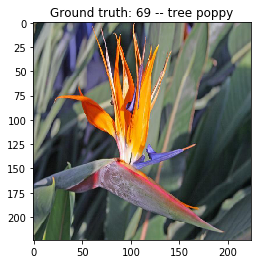

In [209]:
show(23)

In [ ]:
img = mpimg.imread('./data/sorted/train/33/image_06950.jpg')
img_resize = resize(img, input_shape)
plt.imshow(img_resize)
print(img_resize.shape)

y = model.predict(img_resize.reshape(1, 224, 224, 3))

In [ ]:
top_5 = y[0].argsort()[-5:][::-1]
for ind in top_5:
    print('{}: {}'.format(ind, config.classes[ind]))